In [13]:
%load_ext autoreload
%autoreload 2

In [58]:
import transformers
from datasets import load_dataset
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import ImageDraw, Image

import os 
if 'notebooks' in os.getcwd():
    os.chdir("..")

## Get and visualize data

In [78]:
# dataset = load_dataset("katanaml/cord", )

dataset = load_dataset("darentang/sroie")

Extracting data files: 100%|██████████| 1/1 [00:12<00:00, 12.47s/it]
Generating train split: 626 examples [00:01, 545.10 examples/s]
Generating test split: 347 examples [00:00, 596.31 examples/s]


In [105]:
dataset['train'].features

{'id': Value(dtype='string', id=None),
 'words': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'bboxes': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-COMPANY', 'I-COMPANY', 'B-DATE', 'I-DATE', 'B-ADDRESS', 'I-ADDRESS', 'B-TOTAL', 'I-TOTAL'], id=None), length=-1, id=None),
 'image_path': Value(dtype='string', id=None)}

In [119]:
def unnormalize_bbox(bbox, width, height):
    return [
        int( (bbox[0] * width /1000)),
        int((bbox[1] * height /1000)),
        int((bbox[2] * width /1000)),
        int((bbox[3] * height / 1000)),
    ]

In [116]:
bboxes = dataset['train'][0]['bboxes']
img_pil = Image.open(dataset['train'][0]['image_path'])

In [120]:
for idx, box in enumerate(bboxes):
    b = unnormalize_bbox(box, img_pil.width, img_pil.height)
    draw = ImageDraw.Draw(img_pil, 'RGB')
    draw.rectangle(b, outline="red")

new_img = img_pil.resize((200,400))

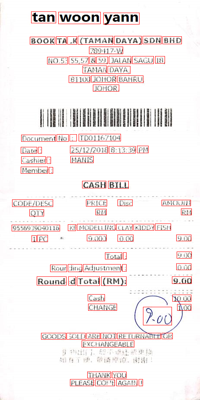

In [121]:
new_img